In [1]:
import networkx as nx
from neo4j import GraphDatabase
driver = GraphDatabase.driver('bolt://neo4j:7687', auth=("neo4j", "BDII2023"))
session = driver.session()
def run_query(query, return_data=True, **kwargs):
        results = session.run(query, kwargs)
        if return_data:
            return results.data()
        return results

### 1. **Mapamundi**: El mapamundi debe mostrar las distintas áreas del juego y como se interconectan unas con otras.


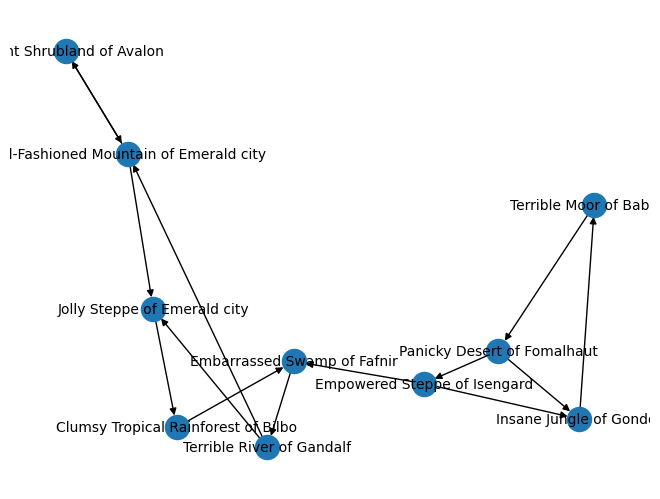

In [32]:
# Make a networkx graph from the neo4j graph
# (a1: Area)-[:SHORTEST_PATH]->(a2: Area)
query = """
MATCH (a1:Area)-[r:SHORTEST_PATH]->(a2:Area)
RETURN a1.name as source, a2.name as target, r.length as length
"""
data = run_query(query)
G = nx.DiGraph()
for row in data:
    G.add_edge(row['source'], row['target'], weight=row['length'])

# Set the position of each node
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, pos=pos, font_size=10)

### 2. **Listado mazmorras**: El listado de mazmorras debe mostrar todas las mazmorras del juego y las áreas con las que están conectadas. Debería ser capaz de ver a simple vista que mazmorras están en cada área y mazmorras hacen de puente entre dos áreas.


### 3. **Mini-mapa mazmorra**: Dada una mazmorra el mini mapa debe mostrar información que ayude a los aventureros a explorar la mazmorra. En el mini mapa debe ser fácil reconocer las entradas y las salidas de una mazmorra. Los pasillos que llevan a salas interesantes. Las zonas donde hay monstruos o tesoros y el nivel/precio de estos